# Exploratory data analysis
On the data, cleaned according to the project requirements, we will perform a small EDA so to understand the key features in the distribution of data. The main purposes are:
1) to better understand the dataset and stimulate our curiousity
1) to improve predictions by either regression, classification or neural networks.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabular_data import load_airbnb

%matplotlib inline

Load the dataset

In [56]:
df = pd.read_csv('./airbnb-property-listings/tabular_data/clean_tabular_data.csv')
# drop extra columns created during the import process
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 19'])

create a dataset with numeric columns only


In [ ]:
df_numeric = df.select_dtypes(include='number')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    889 non-null    object 
 1   Category              889 non-null    object 
 2   Title                 889 non-null    object 
 3   Description           829 non-null    object 
 4   Amenities             889 non-null    object 
 5   Location              889 non-null    object 
 6   guests                889 non-null    int64  
 7   beds                  889 non-null    float64
 8   bathrooms             889 non-null    float64
 9   Price_Night           889 non-null    int64  
 10  Cleanliness_rating    889 non-null    float64
 11  Accuracy_rating       889 non-null    float64
 12  Communication_rating  889 non-null    float64
 13  Location_rating       889 non-null    float64
 14  Check-in_rating       889 non-null    float64
 15  Value_rating          8

In [11]:
df.sample(5)

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,...,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
210,246,764313ad-60b7-426c-b56a-ffe866f80e37,Chalets,Countryside location with hot tub and sauna,['We are offering our pool house which consist...,"['What this place offers', 'Bathroom', 'Hair d...",Vines Cross England United Kingdom,2,1.0,1.0,...,4.9,5.0,5.0,4.9,4.9,4.9,37.0,https://www.airbnb.co.uk/rooms/46709879?adults...,1,NaN
329,366,1065766b-00f0-4ebb-b28a-7112f94fd44b,Chalets,Rectory Farm Retreat,"['Tucked away in the heart of the Cotswolds, t...","['What this place offers', 'Bathroom', 'Shampo...",Oxfordshire England United Kingdom,1,1.0,1.0,...,4.9,5.0,5.0,5.0,5.0,4.8,26.0,https://www.airbnb.co.uk/rooms/20963767?adults...,1,NaN
348,385,f7857015-7d32-463d-98ac-0d5d813fec1a,Chalets,Willow Log Cabin - Sleeping 2 - Hot Tub - Suffolk,['Willow log cabin is a perfect escape in this...,"['What this place offers', 'Bathroom', 'Hair d...",Suffolk England United Kingdom,2,1.0,1.0,...,4.7,4.8,4.8,4.8,4.8,4.8,19.0,https://www.airbnb.co.uk/rooms/15461520?adults...,1,NaN
545,601,fedd4705-7829-42d7-8f72-9c1d237fc031,Amazing pools,"Natural pool, Luxury hot tub with Glamping & Barn",['Two luxury glamping tents both with king siz...,"['What this place offers', 'Scenic views', 'Ga...",Cambridgeshire England United Kingdom,6,3.0,1.5,...,5.0,5.0,5.0,5.0,5.0,4.6,45.0,https://www.airbnb.co.uk/rooms/49147067?adults...,3,NaN
302,339,2a9f056c-2b97-4bed-90e6-dd93930ae696,Chalets,Charming cottage with stunning views -dog frie...,"['Dog friendly, charming, unique ancient cotta...","['What this place offers', 'Bathroom', 'Hair d...",East Sussex England United Kingdom,4,3.0,1.0,...,5.0,5.0,5.0,4.9,5.0,4.8,39.0,https://www.airbnb.co.uk/rooms/44374096?adults...,2,NaN


Print an example of an entry in the 'Amenities' column. This is to understand if it is possible to use this information.

In [69]:
pd.set_option('display.max_colwidth', None)
print(df['Amenities'].sample())

722    ['What this place offers', 'Bathroom', 'Hair dryer', 'Shampoo', 'Hot water', 'Bedroom and laundry', 'Essentials', 'Towels, bed sheets, soap and toilet paper', 'Heating and cooling', 'Heating', 'Home safety', 'Smoke alarm', 'Carbon monoxide alarm', 'Internet and office', 'Wifi', 'Dedicated workspace', 'A desk or table with a chair and space for a laptop.', 'Kitchen and dining', 'Refrigerator', 'Microwave', 'Dishes and silverware', 'Bowls, chopsticks, plates, cups, etc.', 'Location features', 'Lake access', 'Guests can get to a lake using a path or dock', 'Private entrance', 'Separate street or building entrance', 'Outdoor', 'Garden', 'An open space on the property usually covered in grass', 'Parking and facilities', 'Free parking on premises', 'Free on-street parking', 'Services', 'Long-term stays allowed', 'Allow stays of 28 days or more', 'Not included', 'Unavailable: Security cameras on property\nSecurity cameras on property', 'Unavailable: Kitchen\nKitchen', 'Unavailable: TV\

The amenities column is a bit tricky to wrangle as:
1) needs cleaning from 'What this place offers'
1) needs cleaning from 'unavailable' amenities
1) there might be same features called with a slightly different name
1) some entries have duplicated values (e.g.'Towels, bed sheets, soap and toilet paper')
1) I am not entirely sure how practical it would be to hot encode that many values

We will leave out of the features for now.

Let's have a look at the 'Category' column.

In [39]:
df['Category'].unique()

array(['Treehouses', 'Chalets', 'Amazing pools', 'Offbeat', 'Beachfront'],
      dtype=object)

This is a good candidate for One-Hot-Encoding.

Let's have a look the the countries and see if they can be used for regression.

In [46]:
print("Unique countries:", df["Location"].str.split().str[-1].unique())
unique_countries = df["Location"].str.split().str[-1].nunique()
print("The number of unique countries is:", unique_countries)

Unique countries: ['Kingdom' 'France' 'Netherlands' 'States' 'Germany' 'Spain' 'Norway'
 'Romania' 'Latvia' 'Lithuania' 'Croatia' 'Belgium' 'Sweden' 'Estonia'
 'Guadeloupe' 'Rica' 'Colombia' 'Poland' 'Canada' 'Portugal' 'Austria'
 'Czechia' 'Greece' 'Panama' 'Rico' 'Lucia' 'Italy' 'Republic' 'Nicaragua'
 'Tobago' 'Jersey' 'Peru' 'Korea' 'Finland' 'Belize' 'Australia'
 'Indonesia' 'Thailand' 'Mexico' 'Zealand' 'Chile' 'Malaysia' 'Turkey'
 'India' 'Africa' 'Philippines' 'Brazil' 'Ukraine' 'Ireland' 'Ecuador'
 'Luxembourg' 'Japan' 'China']
The number of unique countries is: 53


We have to modify the countries whose name is made by two or words.

In [116]:
print(df["Location"].str.replace('United Kingdom', 'United_Kingdom'))

0                 Llandrindod Wells United_Kingdom
1                      Guyonvelle Grand Est France
2                         Duclair Normandie France
3                    Barmouth Wales United_Kingdom
4      Le Plessis-Feu-Aussoux Île-de-France France
                          ...                     
884                         Lancing United_Kingdom
885       Brighton and Hove England United_Kingdom
886             East Sussex England United_Kingdom
887                  Camber England United_Kingdom
888        Hayling Island Hampshire United_Kingdom
Name: Location, Length: 889, dtype: object


In [113]:
df["Location"].str.split().str[-1]

0      Kingdom
1       France
2       France
3      Kingdom
4       France
        ...   
884    Kingdom
885    Kingdom
886    Kingdom
887    Kingdom
888    Kingdom
Name: Location, Length: 889, dtype: object

In [97]:
pd.options.display.max_rows = 10

It could be interesting to one-hot-encode the countries anyway this would cause a dimensionality explosion considering there are 53 countries. It might be interesting to create country clusters (e.g. by continent). Let's see how could we implement this.

In [108]:
country_to_area = {
    'Kingdom': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'States': 'North America',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Norway': 'Europe',
    'Romania': 'Europe',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Croatia': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Estonia': 'Europe',
    'Guadeloupe': 'Central America',
    'Rica': 'Central America',
    'Colombia': 'South America',
    'Poland': 'Europe',
    'Canada': 'North America',
    'Portugal': 'Europe',
    'Austria': 'Europe',
    '##### Republic': 'Europe',
    'Greece': 'Europe',
    'Panama': 'Central America',
    'Rico': 'Central America',
    'Lucia': 'Central America',
    'Italy': 'Europe',
    'Republic': 'Central America',
    'Nicaragua': 'Central America',
    'Tobago': 'Central America',
    'Jersey': 'Europe',
    'Peru': 'South America',
    'South Korea': 'Asia',
    'Finland': 'Europe',
    'Belize': 'Central America',
    'Australia': 'Australia',
    'Indonesia': 'Asia',
    'Thailand': 'Asia',
    'Mexico': 'Central America',
    'Zealand': 'Australia',
    'Chile': 'South America',
    'Malaysia': 'Asia',
    'Turkey': 'Asia',
    'India': 'Asia',
    'South Africa': 'Africa',
    'Philippines': 'Asia',
    'Brazil': 'South America',
    'Ukraine': 'Europe',
    'Ireland': 'Europe',
    'Ecuador': 'South America',
    'Luxembourg': 'Europe',
    'Japan': 'Asia',
    'China': 'Asia'
}

df['Geographical Area'] = df['Location'].str.split().str[-1].map(country_to_area)
print(df['Geographical Area'])

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
884    Europe
885    Europe
886    Europe
887    Europe
888    Europe
Name: Geographical Area, Length: 889, dtype: object


Let's check if there are any NaN and confirm the value counts

In [109]:
df['Geographical Area'].isna().sum()

9

In [110]:
df['Geographical Area'].value_counts()

Geographical Area
Europe             635
North America      163
Central America     35
Asia                24
South America       16
Australia            7
Name: count, dtype: int64

In [13]:
df_numeric.describe()

,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,bedrooms
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,3.872891,2.392576,1.362205,152.536558,4.852306,4.903262,4.932058,4.903487,4.943307,4.764004,34.767154,1.637795
std,2.367820,1.824505,0.817441,127.170901,0.182999,0.135153,0.122274,0.121362,0.103555,0.181982,14.438702,1.058731
min,1.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000,1.000000
25%,2.000000,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000,1.000000
50%,4.000000,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000,1.000000
75%,4.000000,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,2.000000
max,16.000000,17.000000,10.000000,1132.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,10.000000


/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


['ID', 'Category', 'Title', 'Description', 'Amenities', 'Location', 'url', 'Location_rating_log']


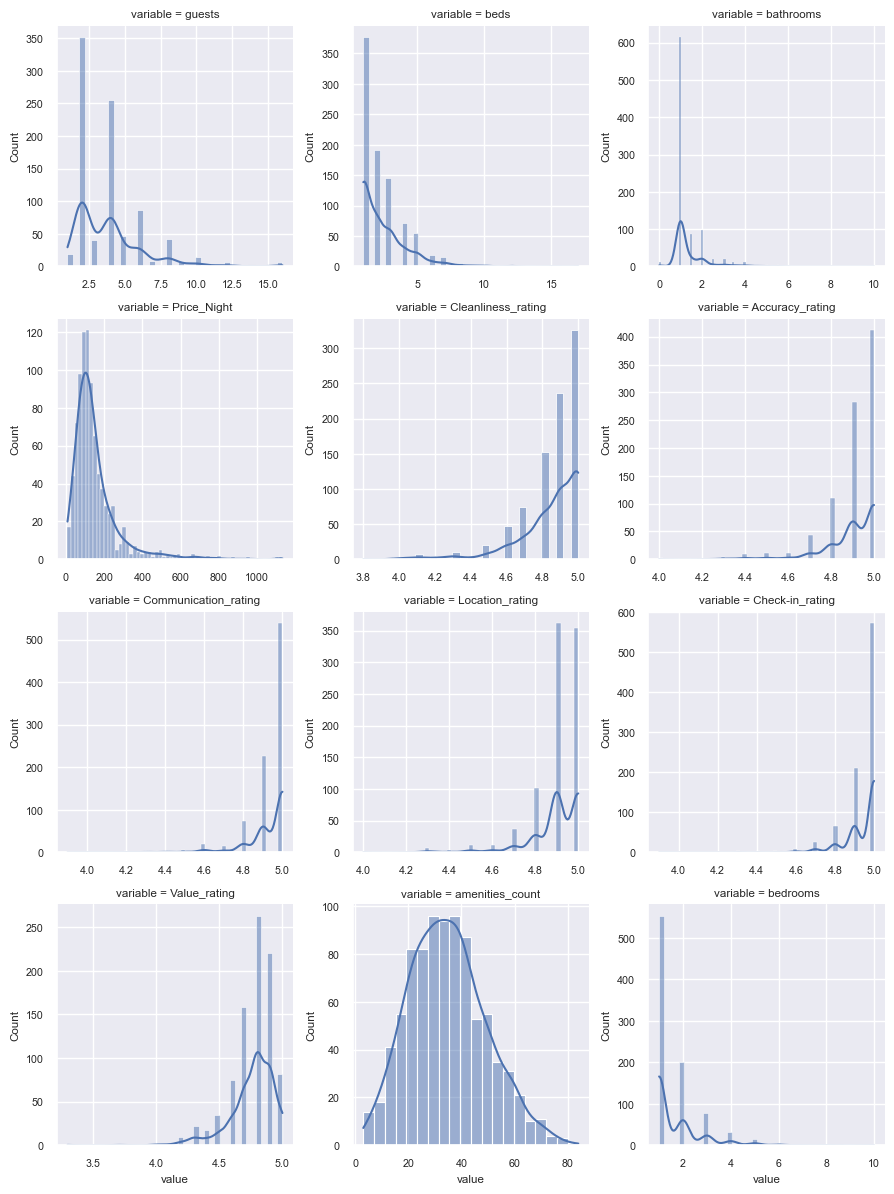

In [80]:
# Set numeric (ie. continuous or ordinal category) features:
numeric_features = ['guests',
                    'beds',
                    'bathrooms',
                    'Price_Night',
                    'Cleanliness_rating',
                    'Accuracy_rating',
                    'Communication_rating',
                    'Location_rating',
                    'Check-in_rating',
                    'Value_rating',
                    'amenities_count',
                    'bedrooms']

categorical_features = [col for col in df.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(categorical_features)

<Axes: ylabel='Price_Night'>

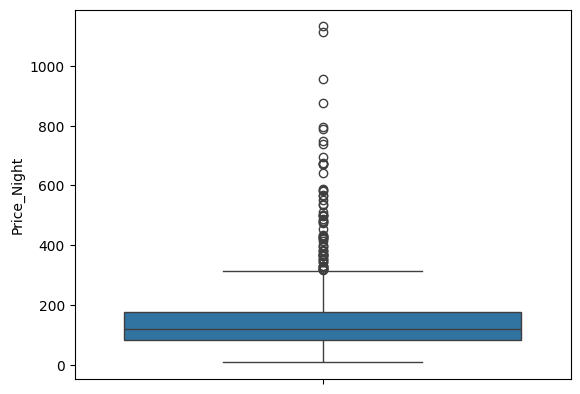

In [37]:
sns.boxplot(df["Price_Night"])

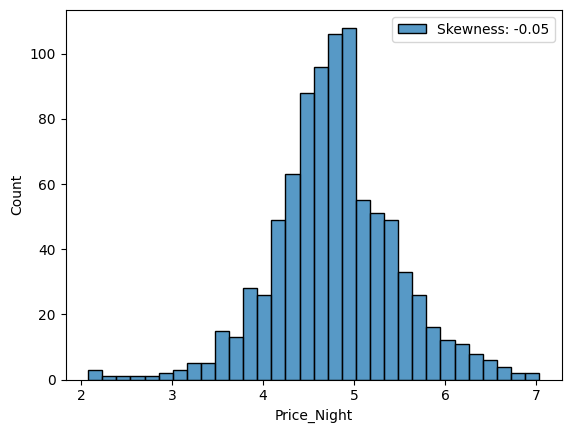

In [19]:
log_price_night = df["Price_Night"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_price_night,label="Skewness: %.2f"%(log_price_night.skew()) )
t.legend()

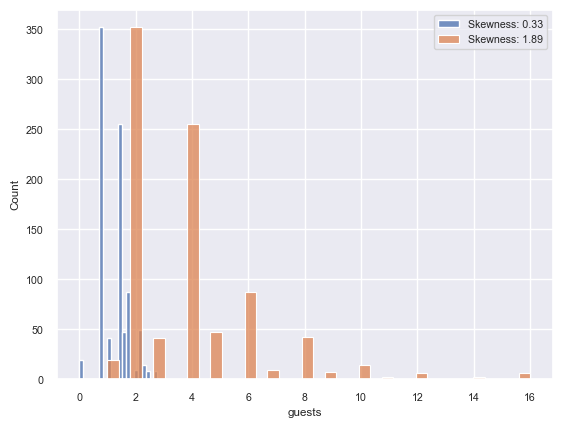

In [73]:
log_guests = df["guests"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_guests,label="Skewness: %.2f"%(log_guests.skew()) )
t.legend()
t=sns.histplot(df["guests"],label="Skewness: %.2f"%(df["guests"].skew()) )
t.legend()

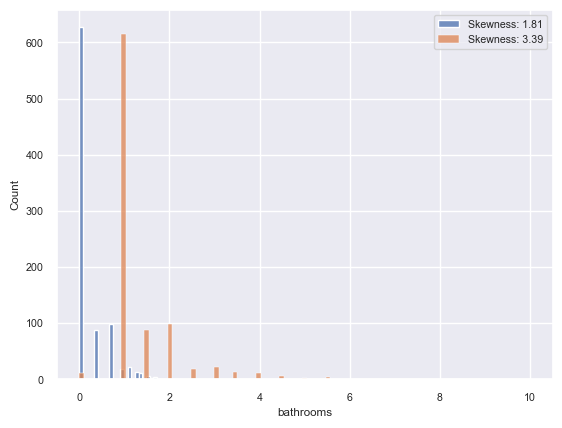

In [81]:
log_value = df["bathrooms"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_value,label="Skewness: %.2f"%(log_value.skew()) )
t.legend()
t=sns.histplot(df["bathrooms"],label="Skewness: %.2f"%(df["bathrooms"].skew()) )
t.legend()

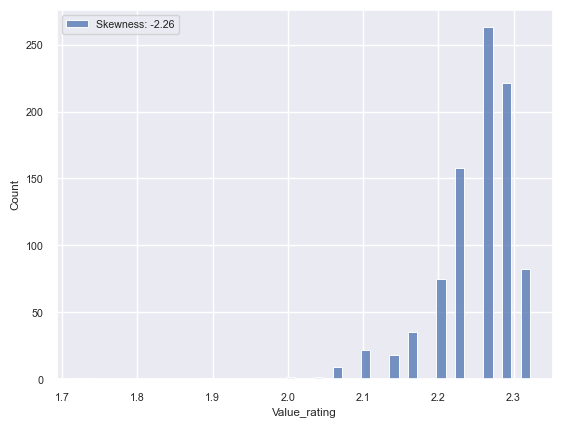

In [89]:
log_value = df["Value_rating"].map(lambda i: np.log(i) if i > 0 else 0)
t = sns.histplot(log_value,label="Skewness: %.2f"%(log_value.skew()) )
t.legend()
#t=sns.histplot(df["Value_rating"],label="Skewness: %.2f"%(df["Value_rating"].skew()) )
#t.legend()

## Variables collinearity
Let's check the degree of correlation between variables

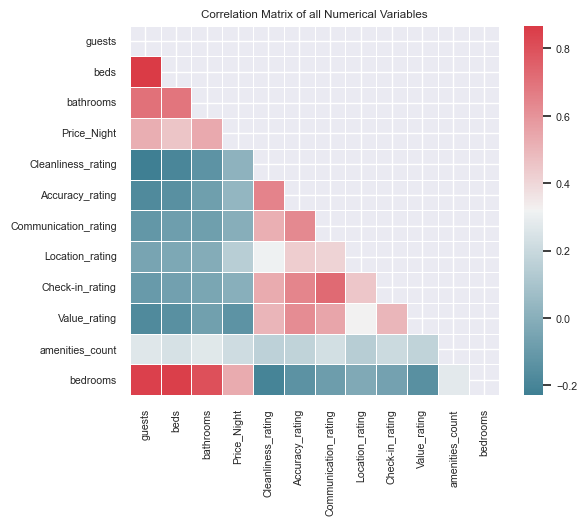

In [91]:
# calculate the Pearson coefficient of correlation for the numerical values
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()